In [73]:
import pandas as pd 
import numpy as np 

In [74]:
df = pd.read_excel(r"Online_Retail.xlsx")

In [75]:
df.shape

(541909, 8)

In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Cleaning and Exploration - TASK 1:

 Handle missing values, especially in the CustomerID and Description fields. Remove duplicate records and correct any anomalies in Quantity and UnitPrice (e.g., negative values which might indicate returns).

### Exploration

 Tasks: Analyze sales trends over time, assess the seasonality effect, and evaluate the impact of holidays on sales. Identify the top-selling products and the most profitable categories.

### Feature Engineering:

Time Features: Extract year, month, day, and possibly weekday from the InvoiceDate to analyze trends over different time frames.
Customer Metrics: Develop features like average purchase frequency, average spend per visit, and total spend per customer.
Product Metrics: Calculate stock turn rate, average price, and sales volume per product.
 

In [77]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### There are null Values in Description and Customer_ID columns ---> Handling this 

In [78]:
# Drop Duplicates from the df 

df = df.drop_duplicates(keep="first")

In [79]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [80]:
df.shape

(536641, 8)

#### After dropping the duplicates the shape of Data Frame Changed from (541909, 8) to (536641, 8)

In [81]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [82]:
#1 Handling Customer_Id by replacing the ids with Mode 

mode = df["CustomerID"].mode()[0]

df["CustomerID"].fillna(mode, inplace=True)

In [83]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [84]:
#2. Handling the Description null values 

df["Description"].fillna("No Description provided",inplace=True)
df["Description"].replace("","No Description provided",inplace=True)

#### Handling the Quanitity Column 

In [85]:
df["Quantity"].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

#### Since Quantity Column has Negative values and We can see quantity can be just 0 so we will refer Negative Quantity as Returned Product. So We can divide the feature Quantity into "Purchased_Quantity" and "Return_Quantity" 

In [86]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [87]:
len(df["Quantity"])

536641

In [88]:
Returned_Quantity = []
Purchased_Quantity = []

for i in df["Quantity"]:
    if i<0:
        Returned_Quantity.append(i)
    else:
        Purchased_Quantity.append(i)

        
#print((Returned_Quantity))
print(len(Returned_Quantity))

#print((Purchased_Quantity))
print(len(Purchased_Quantity))

10587
526054


In [89]:
# Adding the Purchased_Quantity and Returned_Quantity in the dataframe 

df["Purchased_Quantity"] = df["Quantity"].apply(lambda x: x if x>0 else 0)
df["Returned Quantity"] = df["Quantity"].apply(lambda x: -x if x<0 else 0)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchased_Quantity,Returned Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,6,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           536641 non-null  object        
 1   StockCode           536641 non-null  object        
 2   Description         536641 non-null  object        
 3   Quantity            536641 non-null  int64         
 4   InvoiceDate         536641 non-null  datetime64[ns]
 5   UnitPrice           536641 non-null  float64       
 6   CustomerID          536641 non-null  float64       
 7   Country             536641 non-null  object        
 8   Purchased_Quantity  536641 non-null  int64         
 9   Returned Quantity   536641 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 45.0+ MB


#### Drop the Quantity Column Now 

In [91]:
df = df.drop(columns=["Quantity"])

In [92]:
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,Purchased_Quantity,Returned Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,6,0
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0


### Now Till Now we had handled the Null values of CustomerId and description column and also handled the Quantity columns ---> Purchased and Returned with no Null values whatsoever

In [93]:
df.isnull().sum()

InvoiceNo             0
StockCode             0
Description           0
InvoiceDate           0
UnitPrice             0
CustomerID            0
Country               0
Purchased_Quantity    0
Returned Quantity     0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           536641 non-null  object        
 1   StockCode           536641 non-null  object        
 2   Description         536641 non-null  object        
 3   InvoiceDate         536641 non-null  datetime64[ns]
 4   UnitPrice           536641 non-null  float64       
 5   CustomerID          536641 non-null  float64       
 6   Country             536641 non-null  object        
 7   Purchased_Quantity  536641 non-null  int64         
 8   Returned Quantity   536641 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.9+ MB


##### Looks Good for now

## TASK - 2 Feature Engineering

#### Extracting Year Month Date from Invoice Date 

In [95]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Date"] = df["InvoiceDate"].dt.day

# Extracting Hours, Mins and Seconds 

df["Hours"] = df["InvoiceDate"].dt.hour
df["Mins"] = df["InvoiceDate"].dt.minute
df["Secs"] = df["InvoiceDate"].dt.second


In [96]:
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,Purchased_Quantity,Returned Quantity,Year,Month,Date,Hours,Mins,Secs
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,6,0,2010,12,1,8,26,0
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,0,2010,12,1,8,26,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0


#### Extract weekday from invoice Date
 

In [97]:
df["WeekDay"] = df["InvoiceDate"].dt.day_name()

In [98]:
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,Purchased_Quantity,Returned Quantity,Year,Month,Date,Hours,Mins,Secs,WeekDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,0,2010,12,1,8,26,0,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday


In [99]:
# Dropping the Invoice Date 

df = df.drop(columns=["InvoiceDate"])

In [100]:
df.head()

,InvoiceNo,StockCode,Description,UnitPrice,CustomerID,Country,Purchased_Quantity,Returned Quantity,Year,Month,Date,Hours,Mins,Secs,WeekDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday
1,536365,71053,WHITE METAL LANTERN,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,17850.0,United Kingdom,8,0,2010,12,1,8,26,0,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           536641 non-null  object 
 1   StockCode           536641 non-null  object 
 2   Description         536641 non-null  object 
 3   UnitPrice           536641 non-null  float64
 4   CustomerID          536641 non-null  float64
 5   Country             536641 non-null  object 
 6   Purchased_Quantity  536641 non-null  int64  
 7   Returned Quantity   536641 non-null  int64  
 8   Year                536641 non-null  int64  
 9   Month               536641 non-null  int64  
 10  Date                536641 non-null  int64  
 11  Hours               536641 non-null  int64  
 12  Mins                536641 non-null  int64  
 13  Secs                536641 non-null  int64  
 14  WeekDay             536641 non-null  object 
dtypes: float64(2), int64(8), object(5)

In [102]:
df.isnull().sum()

InvoiceNo             0
StockCode             0
Description           0
UnitPrice             0
CustomerID            0
Country               0
Purchased_Quantity    0
Returned Quantity     0
Year                  0
Month                 0
Date                  0
Hours                 0
Mins                  0
Secs                  0
WeekDay               0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           536641 non-null  object 
 1   StockCode           536641 non-null  object 
 2   Description         536641 non-null  object 
 3   UnitPrice           536641 non-null  float64
 4   CustomerID          536641 non-null  float64
 5   Country             536641 non-null  object 
 6   Purchased_Quantity  536641 non-null  int64  
 7   Returned Quantity   536641 non-null  int64  
 8   Year                536641 non-null  int64  
 9   Month               536641 non-null  int64  
 10  Date                536641 non-null  int64  
 11  Hours               536641 non-null  int64  
 12  Mins                536641 non-null  int64  
 13  Secs                536641 non-null  int64  
 14  WeekDay             536641 non-null  object 
dtypes: float64(2), int64(8), object(5)

##  Analysis Part - Task-3

#### Tasks: Analyze sales trends over time, assess the seasonality effect, and evaluate the impact of holidays on sales. Identify the top-selling products and the most profitable categories.

In [104]:
df.head()

,InvoiceNo,StockCode,Description,UnitPrice,CustomerID,Country,Purchased_Quantity,Returned Quantity,Year,Month,Date,Hours,Mins,Secs,WeekDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday
1,536365,71053,WHITE METAL LANTERN,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,17850.0,United Kingdom,8,0,2010,12,1,8,26,0,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday


### 3.1 Sales Trend Over Time

In [105]:
df["Total_Sales"] = df["Purchased_Quantity"] * df["UnitPrice"]
df["Total_Sales"].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Total_Sales, dtype: float64

### 3.2 Monthly Sales 

In [106]:
monthly_sales = df.groupby("Month")["Total_Sales"].sum().reset_index()
monthly_sales   # Currency in Sterling 

,Month,Total_Sales
0,1,689811.610
1,2,522545.560
2,3,716215.260
3,4,536968.491
4,5,769296.610
5,6,760547.010
6,7,718076.121
7,8,735717.260
8,9,1056435.192
9,10,1151263.730


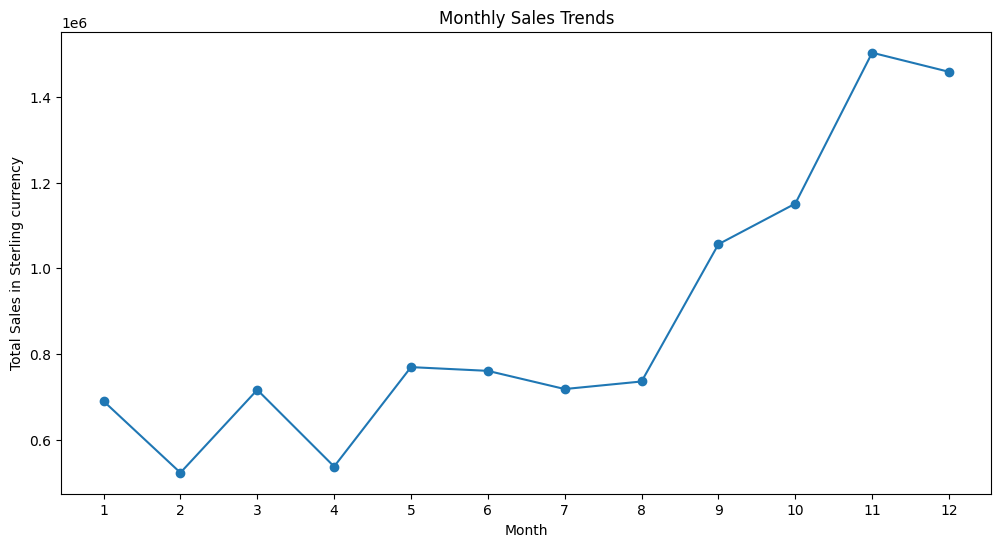

In [107]:
# Plot

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Total_Sales'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales in Sterling currency')

plt.show()

### 3.3 Seasonality Effect 

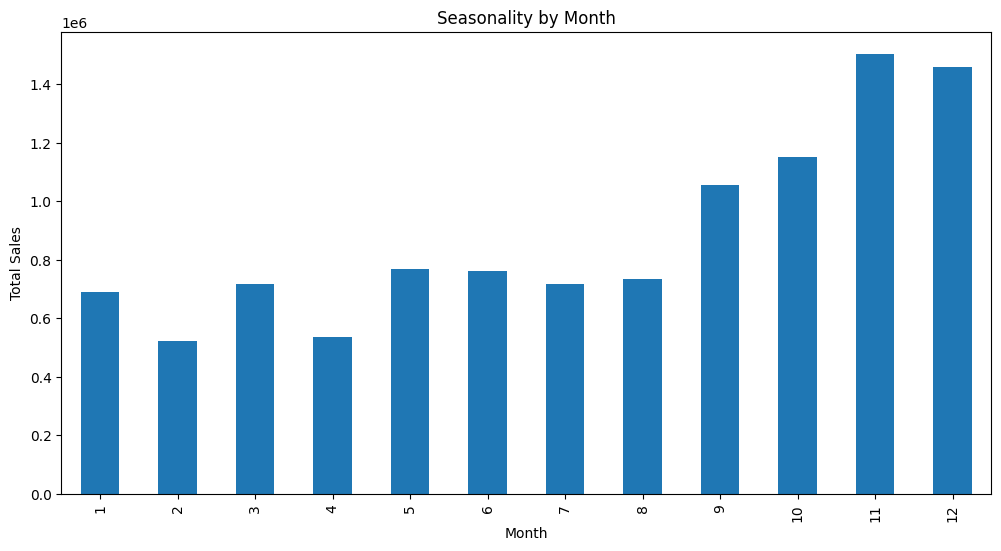

In [108]:
Seasonality_by_month = df.groupby("Month")["Total_Sales"].sum()

plt.figure(figsize=(12, 6))
Seasonality_by_month.plot(kind='bar')
plt.title('Seasonality by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [109]:
df["WeekDay"].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

WeekDay
Friday       1815346.371
Monday       1775782.071
Sunday        806790.781
Thursday     2199292.570
Tuesday      2175700.511
Wednesday    1847074.380
Name: Total_Sales, dtype: float64


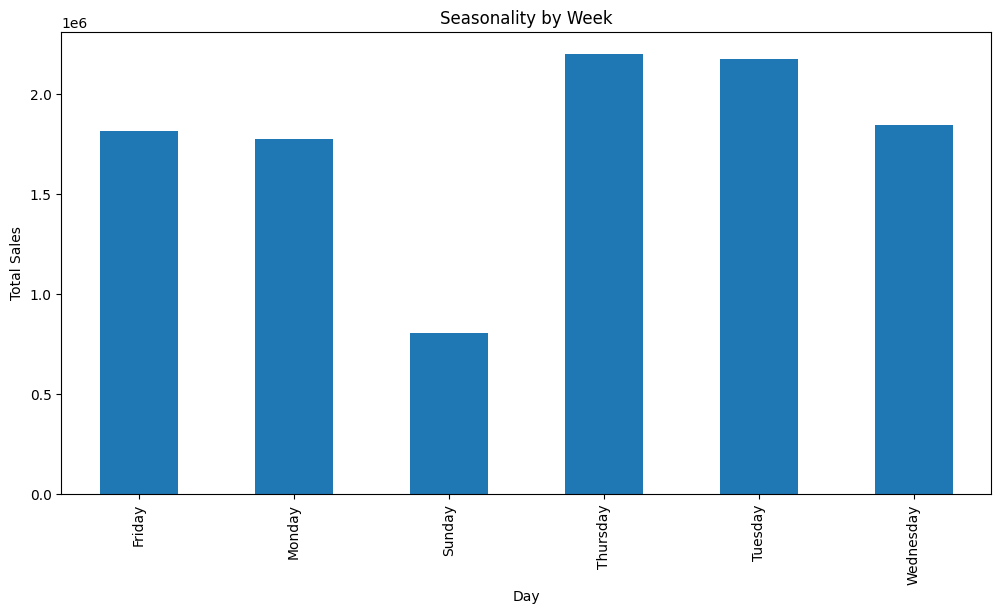

In [110]:
Seasonality_by_week = df.groupby("WeekDay")["Total_Sales"].sum()
print(Seasonality_by_week)

plt.figure(figsize=(12, 6))
Seasonality_by_week.plot(kind='bar')
plt.title('Seasonality by Week')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.show()

### 3.4 Top Selling Product

In [111]:
top_selling_product = df.groupby("StockCode")["Total_Sales"].sum().sort_values(ascending=False).head(10)
print(top_selling_product)

StockCode
DOT       206248.77
22423     174156.54
23843     168469.60
85123A    104462.75
47566      99445.23
85099B     94159.81
23166      81700.92
POST       78101.88
M          77750.27
23084      66870.03
Name: Total_Sales, dtype: float64


### 3.5 Most Profitable Product Categories 

In [112]:
most_profitable_category = df.groupby("Description")["Total_Sales"].sum().sort_values(ascending=False).head(10)  # Top 10
print(most_profitable_category)

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174156.54
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106236.72
PARTY BUNTING                          99445.23
JUMBO BAG RED RETROSPOT                94159.81
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
POSTAGE                                78101.88
Manual                                 77752.82
RABBIT NIGHT LIGHT                     66870.03
Name: Total_Sales, dtype: float64


/tmp/ipykernel_8586/1038925927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_profitable_category.values, y=most_profitable_category.index, palette='viridis')


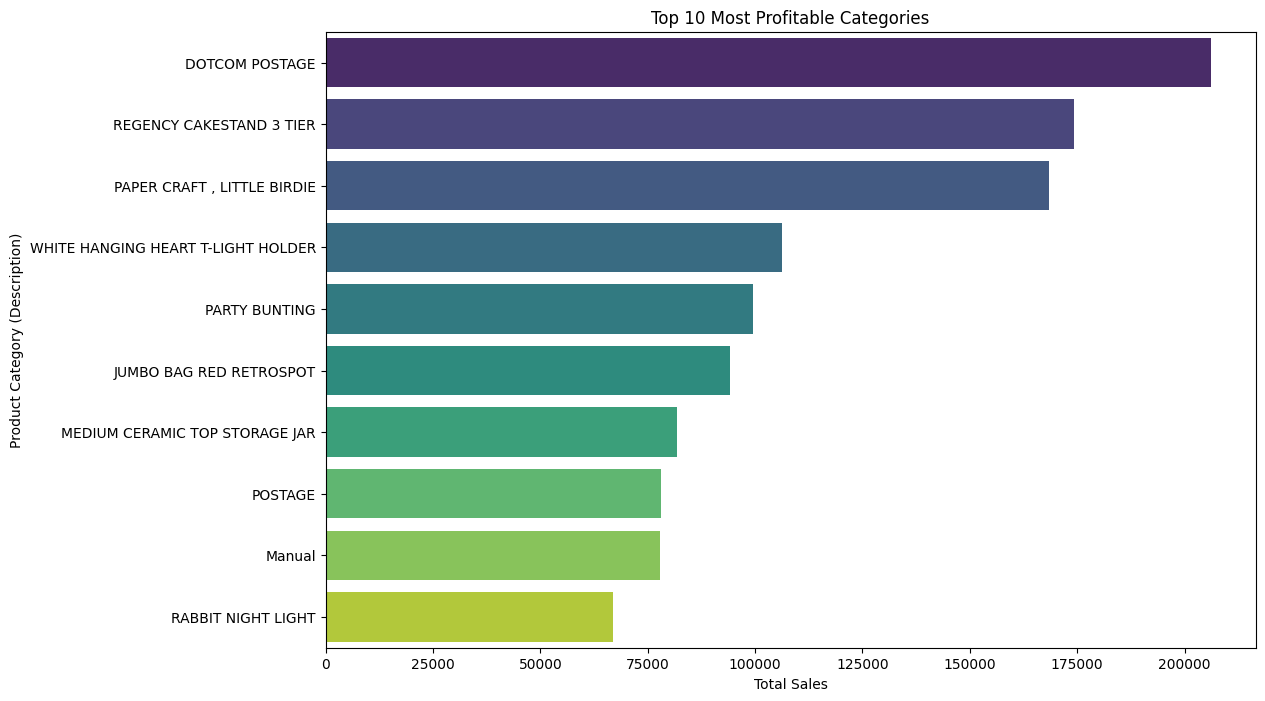

In [113]:
plt.figure(figsize=(12, 8))
sns.barplot(x=most_profitable_category.values, y=most_profitable_category.index, palette='viridis')

plt.title('Top 10 Most Profitable Categories')
plt.xlabel('Total Sales')
plt.ylabel('Product Category (Description)')
plt.show()

# Analysis Part : Task - 3 : Metrics 

## Customer Metrics

#### Average Purchase Freequency of a Customer


In [114]:
purchase_freq_customer = df.groupby("CustomerID")["InvoiceNo"].nunique()

# print(purchase_freq_customer)
Avg_purchase_freq_customer = purchase_freq_customer.mean()

print(Avg_purchase_freq_customer)

5.924062214089662


#### Average Spend by Customer per visit.
 

In [115]:
df["TotalSpendPerInvoice"] = df.groupby("InvoiceNo")["Total_Sales"].transform('sum')

avg_spend_per_visit = df.groupby("CustomerID")["TotalSpendPerInvoice"].mean()

avg_spend_per_visit.mean()

440.66009288537106

#### Total Amount Spend by Each Customer Per Visit

In [116]:
df["TotalSpendPerInvoice"] = df.groupby("InvoiceNo")["Total_Sales"].transform('sum')

avg_spend_per_visit = df.groupby("CustomerID")["TotalSpendPerInvoice"].mean()

avg_spend_per_visit.mean()

440.66009288537106

#### Total Amount spend by Each Customer

In [117]:
total_spend_by_per_customer = df.groupby("CustomerID")["Total_Sales"].sum()

total_spend_by_per_customer

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: Total_Sales, Length: 4372, dtype: float64

## Product Metrics

#### Total Sales of every product by Volume

In [118]:
sales_per_prod_by_vol = df.groupby("StockCode")["Purchased_Quantity"].sum()
print(sales_per_prod_by_vol.head())

StockCode
10002    1040
10080     495
10120     192
10125    1295
10133    2856
Name: Purchased_Quantity, dtype: int64


#### Average Price per Product

In [119]:
avg_price_per_product = df.groupby("StockCode")["UnitPrice"].mean()
print(avg_price_per_product.head())

StockCode
10002    1.056849
10080    0.376667
10120    0.210000
10125    0.859785
10133    0.648081
Name: UnitPrice, dtype: float64


#### Sales Volume per Product

In [120]:
sales_vol_per_product = df.groupby("StockCode")["Purchased_Quantity"].sum()

print(sales_per_prod_by_vol)

StockCode
10002           1040
10080            495
10120            192
10125           1295
10133           2856
                ... 
gift_0001_20      20
gift_0001_30      37
gift_0001_40       3
gift_0001_50       4
m                  1
Name: Purchased_Quantity, Length: 4070, dtype: int64


In [121]:
df["StockOnHand"] = df.groupby("StockCode")["Purchased_Quantity"].transform('max')

df[["StockCode","Purchased_Quantity","StockOnHand"]].drop_duplicates().head(10)

,StockCode,Purchased_Quantity,StockOnHand
0,85123A,6,4000
1,71053,6,120
2,84406B,8,128
3,84029G,6,280
4,84029E,6,408
5,22752,2,96
6,21730,6,18
7,22633,6,192
8,22632,6,192
9,84879,32,2880


#### Stock Turn Rate

In [122]:
stock_on_hand = df.groupby("StockCode")["StockOnHand"].mean()

stock_turn_rate = sales_vol_per_product/ stock_on_hand

print(stock_turn_rate.sort_values().head(10))

StockCode
m         1.0
51014c    1.0
62095B    1.0
62096B    1.0
72802c    1.0
72803B    1.0
72803b    1.0
90162A    1.0
20849     1.0
79323B    1.0
dtype: float64


## Completed Analysis of Data Here  

# --------------------------------------------------------------------------------- 

# Machine Learning Implementation  

In [123]:
df.head()

,InvoiceNo,StockCode,Description,UnitPrice,CustomerID,Country,Purchased_Quantity,Returned Quantity,Year,Month,Date,Hours,Mins,Secs,WeekDay,Total_Sales,TotalSpendPerInvoice,StockOnHand
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday,15.30,139.12,4000
1,536365,71053,WHITE METAL LANTERN,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday,20.34,139.12,120
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,17850.0,United Kingdom,8,0,2010,12,1,8,26,0,Wednesday,22.00,139.12,128
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday,20.34,139.12,280
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,17850.0,United Kingdom,6,0,2010,12,1,8,26,0,Wednesday,20.34,139.12,408


In [124]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'UnitPrice', 'CustomerID',
       'Country', 'Purchased_Quantity', 'Returned Quantity', 'Year', 'Month',
       'Date', 'Hours', 'Mins', 'Secs', 'WeekDay', 'Total_Sales',
       'TotalSpendPerInvoice', 'StockOnHand'],
      dtype='object')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   InvoiceNo             536641 non-null  object 
 1   StockCode             536641 non-null  object 
 2   Description           536641 non-null  object 
 3   UnitPrice             536641 non-null  float64
 4   CustomerID            536641 non-null  float64
 5   Country               536641 non-null  object 
 6   Purchased_Quantity    536641 non-null  int64  
 7   Returned Quantity     536641 non-null  int64  
 8   Year                  536641 non-null  int64  
 9   Month                 536641 non-null  int64  
 10  Date                  536641 non-null  int64  
 11  Hours                 536641 non-null  int64  
 12  Mins                  536641 non-null  int64  
 13  Secs                  536641 non-null  int64  
 14  WeekDay               536641 non-null  object 
 15  

In [126]:
# Label Encoding 

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer #to convert the description column into numerical value

In [127]:
label_encoder = LabelEncoder()
df["StockCode_encoded"] = label_encoder.fit_transform(df["StockCode"].astype(str))
df["Country_encoded"] = label_encoder.fit_transform(df["Country"].astype(str))
df["WeekDay_encoded"] = label_encoder.fit_transform(df["WeekDay"].astype(str))
df["InvoiceNo_encoded"] = label_encoder.fit_transform(df["InvoiceNo"].astype(str))

In [128]:
df.head()

,InvoiceNo,StockCode,Description,UnitPrice,CustomerID,Country,Purchased_Quantity,Returned Quantity,Year,Month,...,Mins,Secs,WeekDay,Total_Sales,TotalSpendPerInvoice,StockOnHand,StockCode_encoded,Country_encoded,WeekDay_encoded,InvoiceNo_encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,17850.0,United Kingdom,6,0,2010,12,...,26,0,Wednesday,15.30,139.12,4000,3536,36,5,0
1,536365,71053,WHITE METAL LANTERN,3.39,17850.0,United Kingdom,6,0,2010,12,...,26,0,Wednesday,20.34,139.12,120,2794,36,5,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,17850.0,United Kingdom,8,0,2010,12,...,26,0,Wednesday,22.00,139.12,128,3044,36,5,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,17850.0,United Kingdom,6,0,2010,12,...,26,0,Wednesday,20.34,139.12,280,2985,36,5,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,17850.0,United Kingdom,6,0,2010,12,...,26,0,Wednesday,20.34,139.12,408,2984,36,5,0


### StockCode and Country is now encoded Let's handle Description using TfIdf vectorize

In [129]:
tfidf_vect = TfidfVectorizer(max_features=100)
description_tfidf = tfidf_vect.fit_transform(df["Description"].astype(str)).toarray()

#### Now We can drop the extra columns

In [130]:
df = df.drop(columns=["InvoiceNo","StockCode","Country","Description","WeekDay"])

In [131]:
df.head()

,UnitPrice,CustomerID,Purchased_Quantity,Returned Quantity,Year,Month,Date,Hours,Mins,Secs,Total_Sales,TotalSpendPerInvoice,StockOnHand,StockCode_encoded,Country_encoded,WeekDay_encoded,InvoiceNo_encoded
0,2.55,17850.0,6,0,2010,12,1,8,26,0,15.30,139.12,4000,3536,36,5,0
1,3.39,17850.0,6,0,2010,12,1,8,26,0,20.34,139.12,120,2794,36,5,0
2,2.75,17850.0,8,0,2010,12,1,8,26,0,22.00,139.12,128,3044,36,5,0
3,3.39,17850.0,6,0,2010,12,1,8,26,0,20.34,139.12,280,2985,36,5,0
4,3.39,17850.0,6,0,2010,12,1,8,26,0,20.34,139.12,408,2984,36,5,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   UnitPrice             536641 non-null  float64
 1   CustomerID            536641 non-null  float64
 2   Purchased_Quantity    536641 non-null  int64  
 3   Returned Quantity     536641 non-null  int64  
 4   Year                  536641 non-null  int64  
 5   Month                 536641 non-null  int64  
 6   Date                  536641 non-null  int64  
 7   Hours                 536641 non-null  int64  
 8   Mins                  536641 non-null  int64  
 9   Secs                  536641 non-null  int64  
 10  Total_Sales           536641 non-null  float64
 11  TotalSpendPerInvoice  536641 non-null  float64
 12  StockOnHand           536641 non-null  int64  
 13  StockCode_encoded     536641 non-null  int64  
 14  Country_encoded       536641 non-null  int64  
 15  

In [133]:
df["UnitPrice"] = df["UnitPrice"].astype('int')
df["CustomerID"] = df["CustomerID"].astype('int')

df["Total_Sales"] = df["Total_Sales"].astype('int')
df["TotalSpendPerInvoice"] = df["TotalSpendPerInvoice"].astype('int')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   UnitPrice             536641 non-null  int64
 1   CustomerID            536641 non-null  int64
 2   Purchased_Quantity    536641 non-null  int64
 3   Returned Quantity     536641 non-null  int64
 4   Year                  536641 non-null  int64
 5   Month                 536641 non-null  int64
 6   Date                  536641 non-null  int64
 7   Hours                 536641 non-null  int64
 8   Mins                  536641 non-null  int64
 9   Secs                  536641 non-null  int64
 10  Total_Sales           536641 non-null  int64
 11  TotalSpendPerInvoice  536641 non-null  int64
 12  StockOnHand           536641 non-null  int64
 13  StockCode_encoded     536641 non-null  int64
 14  Country_encoded       536641 non-null  int64
 15  WeekDay_encoded       536641 non-n

In [135]:
df.head()

,UnitPrice,CustomerID,Purchased_Quantity,Returned Quantity,Year,Month,Date,Hours,Mins,Secs,Total_Sales,TotalSpendPerInvoice,StockOnHand,StockCode_encoded,Country_encoded,WeekDay_encoded,InvoiceNo_encoded
0,2,17850,6,0,2010,12,1,8,26,0,15,139,4000,3536,36,5,0
1,3,17850,6,0,2010,12,1,8,26,0,20,139,120,2794,36,5,0
2,2,17850,8,0,2010,12,1,8,26,0,22,139,128,3044,36,5,0
3,3,17850,6,0,2010,12,1,8,26,0,20,139,280,2985,36,5,0
4,3,17850,6,0,2010,12,1,8,26,0,20,139,408,2984,36,5,0


In [136]:
X = df.drop(columns=["Total_Sales"])
y = df["Total_Sales"]

In [137]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

param_dict = {
    'n-estimators' : randint(100,500),
    'learning-rate': uniform(0.01,0.3),
    'max-depth' : randint(3,10),
    'min_child_weight' : randint(1,10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
#     parm_distribution = param_dict,
    param_distributions=param_dict,
    n_iter = 100,
    cv=3,
    n_jobs=1,
    verbose=3,
    scoring='r2'
)


# Perform the hyperparameter search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters: ", best_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] colsample_bytree=0.8513125266654946, learning-rate=0.2916626358283667, max-depth=7, min_child_weight=1, n-estimators=341, subsample=0.5733406208106305 
[CV]  colsample_bytree=0.8513125266654946, learning-rate=0.2916626358283667, max-depth=7, min_child_weight=1, n-estimators=341, subsample=0.5733406208106305, score=0.871, total=  18.1s
[CV] colsample_bytree=0.8513125266654946, learning-rate=0.2916626358283667, max-depth=7, min_child_weight=1, n-estimators=341, subsample=0.5733406208106305 
[CV]  colsample_bytree=0.8513125266654946, learning-rate=0.2916626358283667, max-depth=7, min_child_weight=1, n-estimators=341, subsample=0.5733406208106305, score=0.082, total=  17.5s
[CV] colsample_bytree=0.8513125266654946, learning-rate=0.2916626358283667, max-depth=7, min_child_weight=1, n-estimators=341, subsample=0.5733406208106305 
[CV]  colsample_bytree=0.8513125266654946, learning-rate=0.2916626358283667, max-depth=7, min_ch

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:  8.0min


[CV]  colsample_bytree=0.9730799973533317, learning-rate=0.06070529918287662, max-depth=8, min_child_weight=3, n-estimators=134, subsample=0.6739371729004554, score=0.091, total=  18.8s
[CV] colsample_bytree=0.9730799973533317, learning-rate=0.06070529918287662, max-depth=8, min_child_weight=3, n-estimators=134, subsample=0.6739371729004554 
[CV]  colsample_bytree=0.9730799973533317, learning-rate=0.06070529918287662, max-depth=8, min_child_weight=3, n-estimators=134, subsample=0.6739371729004554, score=0.405, total=  18.6s
[CV] colsample_bytree=0.8544147289235466, learning-rate=0.0926844361662328, max-depth=7, min_child_weight=1, n-estimators=389, subsample=0.7094063377740714 
[CV]  colsample_bytree=0.8544147289235466, learning-rate=0.0926844361662328, max-depth=7, min_child_weight=1, n-estimators=389, subsample=0.7094063377740714, score=0.888, total=  16.3s
[CV] colsample_bytree=0.8544147289235466, learning-rate=0.0926844361662328, max-depth=7, min_child_weight=1, n-estimators=389, s

[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed: 32.6min


[CV]  colsample_bytree=0.7894174506044436, learning-rate=0.06309001639196643, max-depth=6, min_child_weight=7, n-estimators=371, subsample=0.9262202611680543, score=0.084, total=  15.0s
[CV] colsample_bytree=0.7894174506044436, learning-rate=0.06309001639196643, max-depth=6, min_child_weight=7, n-estimators=371, subsample=0.9262202611680543 
[CV]  colsample_bytree=0.7894174506044436, learning-rate=0.06309001639196643, max-depth=6, min_child_weight=7, n-estimators=371, subsample=0.9262202611680543, score=-0.389, total=  14.6s
[CV] colsample_bytree=0.7445331534035338, learning-rate=0.28264607693280863, max-depth=6, min_child_weight=5, n-estimators=126, subsample=0.6429695951375392 
[CV]  colsample_bytree=0.7445331534035338, learning-rate=0.28264607693280863, max-depth=6, min_child_weight=5, n-estimators=126, subsample=0.6429695951375392, score=-2.481, total=  15.7s
[CV] colsample_bytree=0.7445331534035338, learning-rate=0.28264607693280863, max-depth=6, min_child_weight=5, n-estimators=1

[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed: 73.4min


[CV]  colsample_bytree=0.9713926865225168, learning-rate=0.0634986350574645, max-depth=7, min_child_weight=7, n-estimators=353, subsample=0.7646159075875715, score=0.502, total=  17.7s
[CV] colsample_bytree=0.8779105934985731, learning-rate=0.2542232331032841, max-depth=6, min_child_weight=7, n-estimators=216, subsample=0.8482810019376921 
[CV]  colsample_bytree=0.8779105934985731, learning-rate=0.2542232331032841, max-depth=6, min_child_weight=7, n-estimators=216, subsample=0.8482810019376921, score=-0.922, total=  16.2s
[CV] colsample_bytree=0.8779105934985731, learning-rate=0.2542232331032841, max-depth=6, min_child_weight=7, n-estimators=216, subsample=0.8482810019376921 
[CV]  colsample_bytree=0.8779105934985731, learning-rate=0.2542232331032841, max-depth=6, min_child_weight=7, n-estimators=216, subsample=0.8482810019376921, score=0.086, total=  16.9s
[CV] colsample_bytree=0.8779105934985731, learning-rate=0.2542232331032841, max-depth=6, min_child_weight=7, n-estimators=216, sub

In [138]:
# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)


Mean Squared Error:  56618.8254813345
R-squared:  0.267106310714491


In [139]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(X.columns))

X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.2,random_state=42)

In [ ]:
param_dict = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Define the number of fits to perform
max_fits = 10  # Adjust this number as needed

# Initialize the best model and parameters
best_model = None
best_params = None
best_score = -np.inf

for _ in range(max_fits):
    params = {key: dist.rvs() for key, dist in param_dict.items()}
    model = XGBRegressor(**params, random_state=42)
    
    # Fit the model
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score:
        best_score = score
        best_model = model
        best_params = params
    
    print(f"Current Parameters: {params}")
    print(f"Current R^2 Score: {score}")

print("Best Parameters: ", best_params)
print("Best R^2 Score: ", best_score)


Current Parameters: {'n_estimators': 428, 'learning_rate': 0.27127850197680453, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.9031435259882592, 'colsample_bytree': 0.5937085485885056, 'gamma': 0.4698704222118903, 'reg_alpha': 0.32945179580781025, 'reg_lambda': 0.7769115335242125}
Current R^2 Score: 0.9010654081299981
Current Parameters: {'n_estimators': 279, 'learning_rate': 0.253121827167955, 'max_depth': 9, 'min_child_weight': 6, 'subsample': 0.8653486309919535, 'colsample_bytree': 0.7023915184953947, 'gamma': 0.4352543027183831, 'reg_alpha': 0.027976705987566408, 'reg_lambda': 0.4901559464223826}
Current R^2 Score: 0.9061337769447283
Current Parameters: {'n_estimators': 320, 'learning_rate': 0.1130747010105125, 'max_depth': 4, 'min_child_weight': 9, 'subsample': 0.9990358299801527, 'colsample_bytree': 0.6265397542099091, 'gamma': 0.19260247974483508, 'reg_alpha': 0.5535805214070547, 'reg_lambda': 0.6809944237854165}
Current R^2 Score: 0.8272579404340313
Current Parameters: {

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Instantiate models
models = {
    'XGBoost': XGBRegressor(random_state=42, **best_params),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}, R-squared: {r2}")